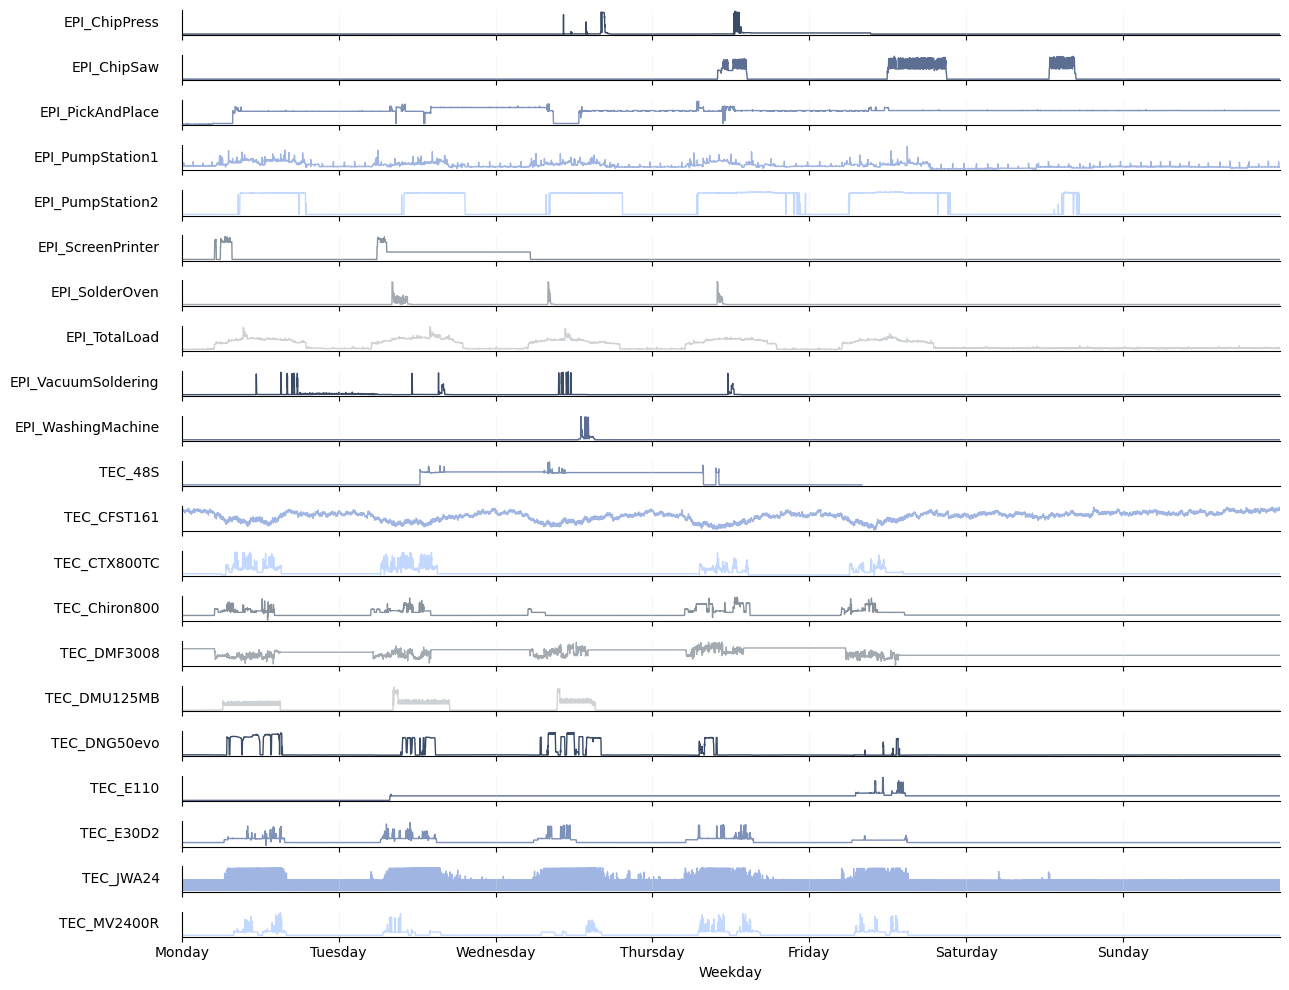

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------- 1) FILE LIST (all 23) ----------------
YEAR = 2024
# (machine) : (path, value_column, units)
MANIFEST = {
    # ----- EPI (kW) -----
    "EPI_ChipPress":      (fr"../dataset_clean\EPI_ChipPress\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_ChipSaw":        (fr"../dataset_clean\EPI_ChipSaw\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_PickAndPlace":   (fr"../dataset_clean\EPI_PickAndPlace\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_PumpStation1":   (fr"../dataset_clean\EPI_PumpStation1\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_PumpStation2":   (fr"../dataset_clean\EPI_PumpStation2\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_ScreenPrinter":  (fr"../dataset_clean\EPI_ScreenPrinter\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_SolderOven":     (fr"../dataset_clean\EPI_SolderOven\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_TotalLoad":      (fr"../dataset_clean\EPI_TotalLoad\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_VacuumSoldering":(fr"../dataset_clean\EPI_VacuumSoldering\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_WashingMachine": (fr"../dataset_clean\EPI_WashingMachine\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),
    "EPI_HighTempOven":   (fr"../dataset_clean\EPI_HighTempOven\P_total\{YEAR}_P_total.csv.xz", "P_total", "kW"),

    # ----- TEC (W -> kW) -----
    "TEC_48S":        (fr"../dataset_clean\TEC_48S\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_CFST161":    (fr"../dataset_clean\TEC_CFST161\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_CTX800TC":   (fr"../dataset_clean\TEC_CTX800TC\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_Chiron800":  (fr"../dataset_clean\TEC_Chiron800\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_DMF3008":    (fr"../dataset_clean\TEC_DMF3008\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_DMU125MB":   (fr"../dataset_clean\TEC_DMU125MB\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_DNG50evo":   (fr"../dataset_clean\TEC_DNG50evo\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_E110":       (fr"../dataset_clean\TEC_E110\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_E30D2":      (fr"../dataset_clean\TEC_E30D2\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_JWA24":      (fr"../dataset_clean\TEC_JWA24\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),
    "TEC_MV2400R":    (fr"../dataset_clean\TEC_MV2400R\P_total\{YEAR}_P_total.csv.xz", "P_total", "W"),

    # ----- PV (W -> kW) -----
    "EPI_PV":         (fr"../dataset_clean\EPI_PV\AC_ActivePower\{YEAR}_AC_ActivePower.csv.xz", "AC_ActivePower", "W"),
}

# ---------------- 2) LOAD ALL TO 1-MIN DF ----------------
def load_series(path, value_col, units):
    if not Path(path).exists():
        return None
    df = pd.read_csv(path, usecols=["WsDateTime", value_col], parse_dates=["WsDateTime"])
    df = df.set_index("WsDateTime").sort_index()
    s = df[value_col]
    if units.lower() == "w":
        s = s / 1000.0  # -> kW
    s = s.resample("1min").mean()
    return s

series = {}
for machine, (p, col, unit) in MANIFEST.items():
    s = load_series(p, col, unit)
    if s is not None:
        series[machine] = s

df_1min = pd.DataFrame(series).sort_index()  # one DataFrame with all machines at 1-min (kW)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# ---- custom color palette (your colors) ----
colors = ["#3b4c68", "#5c6e91", "#7e91b9", "#a0b5e2",
          "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]

# ---- 1) Per-machine week offsets (0=first Monday-aligned week, 1=skip 1 week, …) ----
week_offsets = {
    # EPI (11)
    "EPI_ChipPress": 32,
    "EPI_ChipSaw": 6,
    "EPI_PickAndPlace": 2,
    "EPI_PumpStation1": 1,
    "EPI_PumpStation2": 4,
    "EPI_ScreenPrinter": 20,
    "EPI_SolderOven": 2,
    "EPI_TotalLoad": 1,
    "EPI_VacuumSoldering": 11,
    "EPI_WashingMachine": 4,
    "EPI_HighTempOven": 0,

    # TEC (11)
    "TEC_48S": 3,
    "TEC_CFST161": 2,
    "TEC_CTX800TC": 2,
    "TEC_Chiron800": 2,
    "TEC_DMF3008": 2,
    "TEC_DMU125MB": 2,
    "TEC_DNG50evo": 2,
    "TEC_E110": 2,
    "TEC_E30D2": 2,
    "TEC_JWA24": 2,
    "TEC_MV2400R": 2,

    # PV (1)
    "IPE_PV": 5,
}

# ---- 2) Monday-aligned starts from offsets ----
def build_starts_from_offsets(df_1min: pd.DataFrame, week_offsets: dict) -> dict:
    starts = {}
    for m, off in week_offsets.items():
        if m not in df_1min.columns:
            continue
        first = df_1min[m].first_valid_index()
        if first is None:
            continue
        days_ahead = (7 - first.weekday()) % 7  # 0 if already Monday
        monday = (first + pd.Timedelta(days=days_ahead)).normalize()
        starts[m] = monday + pd.Timedelta(weeks=int(off))
    return starts

# ---- 3) Plot: stacked subplots, shared weekday axis, natural y-scale ----
def plot_week_stacked(df: pd.DataFrame,
                      starts_per_machine: dict,
                      days: int = 7) -> None:
    machines = [m for m in df.columns if m in starts_per_machine]
    if not machines:
        print("No matching machines found in df for the provided starts.")
        return

    n = len(machines)
    
    fig, axes = plt.subplots(n, 1, figsize=(13, 10), sharex=True)
    if n == 1:
        axes = [axes]

    # Styling
    plt.rcParams.update({
        "axes.labelsize": 18,
        "axes.titlesize": 18,
        "xtick.labelsize": 13,
        "ytick.labelsize": 18,
        "figure.dpi": 110,
    })

    # Common reference Monday so all subplots share the same x-limits
    ref0 = pd.Timestamp("2024-01-01")  # Monday
    day_edges = [ref0 + pd.Timedelta(days=d) for d in range(days + 1)]
    day_centers = [ref0 + pd.Timedelta(days=d) for d in range(days)]
    weekday_labels = [(ref0 + pd.Timedelta(days=d)).strftime("%A") for d in range(days)]

    for i, (ax, m) in enumerate(zip(axes, machines)):
        start = starts_per_machine[m]
        end = start + pd.Timedelta(days=days)
        s = df[m].loc[start:end - pd.Timedelta(minutes=1)].dropna()

        if s.empty:
            ax.text(0.01, 0.5, "no data in window", transform=ax.transAxes,
                    va="center", ha="left")
            ax.set_ylabel(m, rotation=0, ha="right", va="center", labelpad=16)
            ax.set_yticks([])
            ax.grid(True, axis="x", alpha=0.2)
            continue

        s_ref = s.copy()
        s_ref.index = ref0 + (s.index - start)

        color = colors[i % len(colors)]
        ax.plot(s_ref.index, s_ref.values, lw=1.0, color=color)
        ax.set_ylabel(m, rotation=0, ha="right", va="center", labelpad=16)

        ax.set_yticks([])
        for x in day_edges:
            ax.axvline(x, lw=0.6, alpha=0.25, color="#e6e9ef")
        ax.grid(True, axis="x", alpha=0.15, color="#e6e9ef")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        if i < n - 1:
            ax.tick_params(axis="x", which="both", labelbottom=False)

    axes[-1].set_xlim(day_edges[0], day_edges[-1])
    axes[-1].set_xticks(day_centers)
    axes[-1].set_xticklabels(weekday_labels)
    axes[-1].xaxis.set_major_formatter(DateFormatter("%A"))
    axes[-1].set_xlabel("Weekday")

    plt.tight_layout()
    #plt.savefig("01Figures/Fig_Energy_Profiles.pdf", bbox_inches="tight")
    plt.show()

# ---- 4) Use it ----
# df_1min must already exist with 1-minute resolution columns for each machine.
starts = build_starts_from_offsets(df_1min, week_offsets)
plot_week_stacked(df_1min, starts_per_machine=starts, days=7)


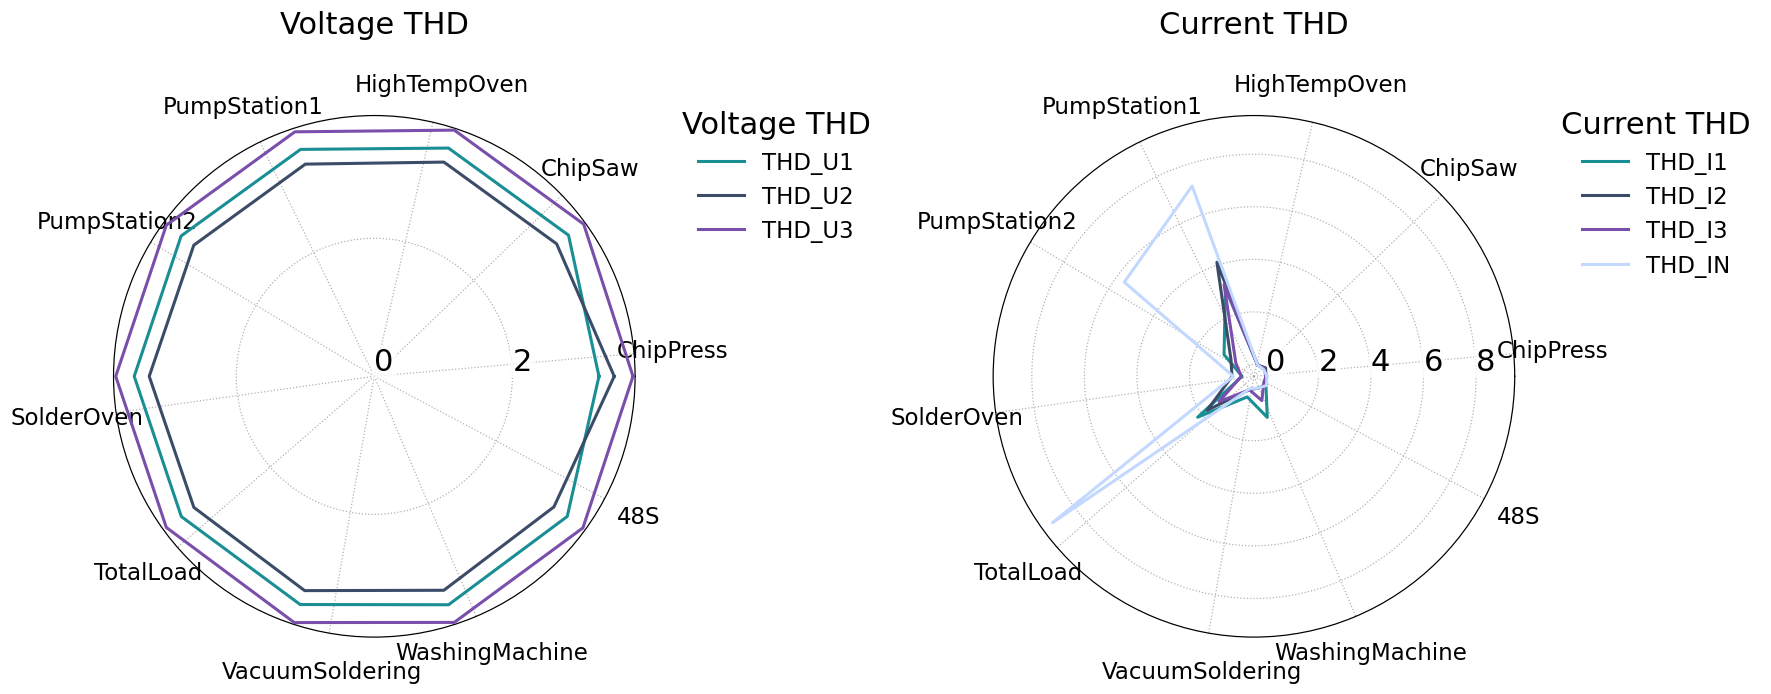

In [2]:
from pathlib import Path
import re, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NEW: your palette
#PALETTE = ["#1B8A8F", "#3b4c68", "#7A4EAB", "#a0b5e2", "#D55E00", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]
PALETTE = ["#1A8E95", "#3B4C68", "#7A4EAB", "#1A8E95", "#3B4C68", "#7A4EAB", "#c3d8ff", "#BFC6CF"]

THD_VOLTAGE_CANDIDATES = ["THD_U1","THD_U2","THD_U3"]
THD_CURRENT_CANDIDATES = ["THD_I1","THD_I2","THD_I3","THD_IN"]

def _machine_dirs(base: Path):
    return sorted([p for p in base.iterdir() if p.is_dir()], key=lambda p: p.name)

def _find_years(machine_dir: Path, meas: str):
    stats_dir = machine_dir / meas
    if not stats_dir.exists():
        return []
    years = []
    for f in stats_dir.glob(f"*_{meas}_stats.csv"):
        m = re.match(r"^(\d{4})_", f.stem)
        if m:
            years.append(int(m.group(1)))
    return sorted(years)

def _stats_path(machine_dir: Path, meas: str, year_rule):
    years = _find_years(machine_dir, meas)
    if not years:
        return None
    y = years[-1] if year_rule == "latest" else int(year_rule)
    if y not in years:
        return None
    p = machine_dir / meas / f"{y}_{meas}_stats.csv"
    return p if p.exists() else None

def _read_stats_row(path: Path) -> pd.Series | None:
    try:
        df = pd.read_csv(path)
        if df.empty:
            return None
        row = df.iloc[0].copy()
        row.index = [c.strip().lower() for c in row.index]
        return row
    except Exception:
        return None

def _get_stat_value(path: Path, stat: str) -> float:
    row = _read_stats_row(path)
    if row is None:
        return np.nan
    try:
        return float(row[stat.lower()])
    except Exception:
        return np.nan

def _downsample_labels(labels: list[str], every: int | None) -> list[str]:
    if every is None:
        every = max(1, math.ceil(len(labels) / 12))
    return [lbl if (i % every == 0) else "" for i, lbl in enumerate(labels)]

def plot_thd_radars_topN(
    base_dir: str | Path,
    year: str | int = "latest",
    stat: str = "q95",
    exclude_machines: tuple[str, ...] = ("EPI_PV",),
    max_machines: int = 10,
    label_every: int | None = None,
    figsize=(14, 7),
    save: str | None = None,
    strip_prefixes: tuple[str, ...] = ("EPI_", "TEC_"),
    # --- NEW: label positioning controls (B: stagger only labels) ---
    tick_angle_offset_deg: float = 0.0,  # global rotation for both panels (labels only)
    stagger_labels: bool = True,         # enable staggering
    stagger_deg: float = 2.0,            # additional angle for every 2nd label
    xtick_pad: int = 8,                  # label padding from axes
):
    base_dir = Path(base_dir)

    machines_all = [mdir.name for mdir in _machine_dirs(base_dir) if mdir.name not in exclude_machines]
    if not machines_all:
        raise RuntimeError("No machines found after applying exclusions.")

    presence_score = {}
    volt_values = {}
    curr_values = {}

    for m in machines_all:
        mdir = base_dir / m
        v_count = 0
        for cand in THD_VOLTAGE_CANDIDATES:
            p = _stats_path(mdir, cand, year)
            if p is not None:
                v_count += 1
        i_count = 0
        for cand in THD_CURRENT_CANDIDATES:
            p = _stats_path(mdir, cand, year)
            if p is not None:
                i_count += 1
        presence_score[m] = (v_count + i_count, v_count, i_count)

    machines_sorted = sorted(
        machines_all, key=lambda m: (-presence_score[m][0], -presence_score[m][1], -presence_score[m][2], m)
    )
    machines = machines_sorted[:max_machines]
    if not machines:
        raise RuntimeError("No machines had any THD files.")

    for lab in THD_VOLTAGE_CANDIDATES:
        vals = []
        for m in machines:
            p = _stats_path(base_dir / m, lab, year)
            vals.append(_get_stat_value(p, stat) if p is not None else np.nan)
        if np.isfinite(np.asarray(vals, float)).any():
            volt_values[lab] = np.asarray(vals, float)

    for lab in THD_CURRENT_CANDIDATES:
        vals = []
        for m in machines:
            p = _stats_path(base_dir / m, lab, year)
            vals.append(_get_stat_value(p, stat) if p is not None else np.nan)
        if np.isfinite(np.asarray(vals, float)).any():
            curr_values[lab] = np.asarray(vals, float)

    # Stable color map per THD channel
    all_labels = THD_VOLTAGE_CANDIDATES + THD_CURRENT_CANDIDATES
    color_map = {lab: PALETTE[i % len(PALETTE)] for i, lab in enumerate(all_labels)}

    # ---------- plotting ----------
    fig, axes = plt.subplots(1, 2, subplot_kw={"projection": "polar"}, figsize=figsize, constrained_layout=True)
    fig.set_constrained_layout_pads(wspace=0.0, hspace=0.02, w_pad=0.05, h_pad=0.05)
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])

    strip_re = re.compile(rf"^({'|'.join(map(re.escape, strip_prefixes))})")
    display_names = [strip_re.sub("", m) for m in machines]

    def plot_panel(ax, data_dict: dict, title: str):
        N = len(machines)
        # Base angles for the data (do NOT stagger these to keep spokes aligned)
        angles = np.linspace(0, 2*np.pi, N, endpoint=False)
        # Label angles: global rotation + optional staggering
        angles_lbl = angles + np.deg2rad(tick_angle_offset_deg)
        if stagger_labels and N > 6:
            # Stagger every second *visible* label slightly
            angles_lbl[1::2] += np.deg2rad(stagger_deg)

        # Labels (with possible downsampling)
        labels = _downsample_labels(display_names, label_every)
        ax.set_xticks(angles_lbl, labels, fontsize=15)
        ax.tick_params(axis='x', pad=xtick_pad)
        ax.set_rlabel_position(0)
        ax.grid(True, linestyle=":", zorder=5)

        # Y limits from data
        all_vals = np.concatenate([v for v in data_dict.values()]) if data_dict else np.array([])
        finite = all_vals[np.isfinite(all_vals)] if all_vals.size else np.array([])
        if finite.size == 0:
            vmin, vmax = 0.0, 1.0
        else:
            vmin, vmax = float(np.nanmin(finite)), float(np.nanmax(finite))
            if vmin == vmax:
                vmin, vmax = 0.0, (vmax if vmax != 0 else 1.0)
        span = vmax - vmin
        ax.set_ylim(vmin - 0.05 * span, vmax + 0.05 * span)

        lo, hi = ax.get_ylim()
        lo_i, hi_i = 0, int(np.floor(hi))
        if hi_i <= lo_i:
            hi_i = lo_i + 1
        step = 2
        ticks = np.arange(lo_i, hi_i + 1, step)
        ax.set_yticks(ticks)
        ax.set_yticklabels([f"{int(t)}" for t in ticks])

        for lbl in ax.get_yticklabels():
            lbl.set_fontsize(20)
            lbl.set_bbox(dict(facecolor="white", edgecolor="none", alpha=0.8, pad=1.5))

        # Plot data using the UN-staggered base angles so traces align with spokes
        ang_c = np.r_[angles, angles[0]]
        for lab, vals in data_dict.items():
            vals = np.asarray(vals, float)
            vals_c = np.r_[vals, vals[0]]
            ax.plot(ang_c, vals_c, linewidth=2, zorder=3, color=color_map.get(lab, "#000000"), label=lab)

        if data_dict:
            leg = ax.legend(
                loc="upper left", bbox_to_anchor=(1.05, 1.05),
                fontsize=15, frameon=False, title=f"{title}"
            )
            leg.get_title().set_fontsize(20)
        ax.set_title(f"{title}", pad=26, fontsize=20)

    plot_panel(axes[0], volt_values, "Voltage THD")
    plot_panel(axes[1], curr_values, "Current THD")

    if save:
        plt.savefig(save, bbox_inches="tight")
    plt.show()

    return {
        "machines": machines,
        "display_names": display_names,
        "stat": stat,
        "voltage_labels": list(volt_values.keys()),
        "current_labels": list(curr_values.keys()),
    }


# ===== Example execution =====
details = plot_thd_radars_topN(
    base_dir="../dataset_clean_validation",
    year="latest",
    stat="mean",
    max_machines=10,
    figsize=(16, 12),
    save=False, #"01Figures/Fig9_thd_radar.pdf",
    tick_angle_offset_deg=5.0,
    stagger_labels=True,
    stagger_deg=3.0,
    xtick_pad=15,
)


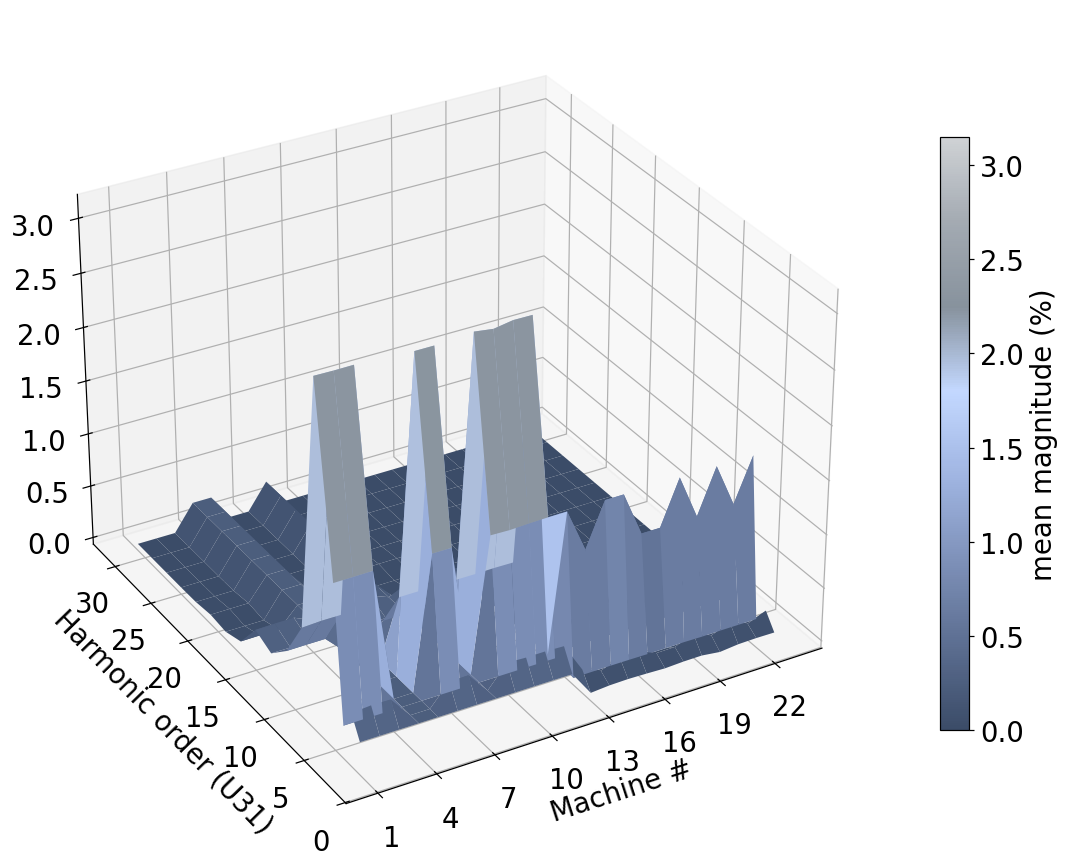

In [4]:
from __future__ import annotations
from pathlib import Path
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
from matplotlib.lines import Line2D

def plot_harmonics_fleet(
    base_dir: str | Path,
    year: str | int = "latest",
    stat: str = "mean",
    fallbacks: tuple[str, ...] = ("q75","q50"),
    agg: str = "mean",
    plot_kind: str = "heatmap",             # "heatmap" | "surface"
    harm_sel: str | None = None,            # e.g., "U12","I1","IN", ...
    odd_only: bool = True,
    order_range: tuple[int | None, int | None] = (3, 31),
    exclude_machines: tuple[str, ...] = (),
    color_clip_quantiles: tuple[float, float] = (1, 99),
    log_color: bool = False,
    figsize: tuple[float, float] | None = None,
    save: str | None = None,
) -> dict:

    base_dir = Path(base_dir)

    # palette -> smooth sequential cmap
    palette = ["#3b4c68", "#5c6e91", "#7e91b9", "#a0b5e2", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]
    cmap = LinearSegmentedColormap.from_list("fleet_seq", palette, N=256)

    # ---------- helpers ----------
    def list_machines(base: Path) -> list[str]:
        ms = [p.name for p in base.iterdir() if p.is_dir()]
        ms = [m for m in ms if m not in exclude_machines]
        return sorted(ms)

    def find_latest_year(stats_dir: Path, meas: str) -> str | None:
        years = []
        for f in stats_dir.glob(f"*_{meas}_stats.csv"):
            m = re.match(r"^(\d{4})_", f.stem)
            if m: years.append(int(m.group(1)))
        return str(max(years)) if years else None

    def stats_path_for(meas_dir: Path, year_sel, meas: str) -> Path | None:
        if year_sel == "latest":
            y = find_latest_year(meas_dir, meas)
            if y is None: return None
            p = meas_dir / f"{y}_{meas}_stats.csv"
            return p if p.exists() else None
        p = meas_dir / f"{year_sel}_{meas}_stats.csv"
        return p if p.exists() else None

    def read_stat(path: Path, stat_name: str, fb: tuple[str, ...]) -> float | None:
        try:
            df = pd.read_csv(path, nrows=1)
            if df.empty: return None
            cols = {c.strip().lower(): c for c in df.columns}
            for key in (stat_name.lower(), *[s.lower() for s in fb]):
                if key in cols:
                    v = pd.to_numeric(df.loc[0, cols[key]], errors="coerce")
                    if pd.notna(v): return float(v)
            return None
        except Exception:
            return None

    # which harmonics (family) to include
    def build_matcher(hsel: str | None):
        if hsel is None:
            pats = (
                r"^(I[123N]_h)(\d+)$",
                r"^(U(?:12|23|31|[123])_h)(\d+)$",
                r"^(V1_h)(\d+)$",
            )
            regexes = [re.compile(p) for p in pats]
            def matcher(meas_name: str):
                for rg in regexes:
                    m = rg.match(meas_name)
                    if m: return m.group(1), int(m.group(2))
                return None
            return matcher
        rg = re.compile(rf"^({re.escape(hsel)}_h)(\d+)$")
        def matcher(meas_name: str):
            m = rg.match(meas_name)
            return (m.group(1), int(m.group(2))) if m else None
        return matcher

    match_harmonic = build_matcher(harm_sel)

    def keep_order(n: int) -> bool:
        omin, omax = order_range
        if odd_only and n % 2 == 0: return False
        if omin is not None and n < omin: return False
        if omax is not None and n > omax: return False
        return True

    # ---------- build matrix ----------
    machines = list_machines(base_dir)
    order_set, per_machine = set(), {}

    for m in machines:
        od = {}
        for meas_dir in (base_dir / m).iterdir():
            if not meas_dir.is_dir(): continue
            meas = meas_dir.name
            mh = match_harmonic(meas)
            if not mh: continue
            _, n = mh
            if not keep_order(n): continue
            sp = stats_path_for(meas_dir, year, meas)
            if sp is None: continue
            v = read_stat(sp, stat, fallbacks)
            if v is None or np.isnan(v): continue
            od.setdefault(n, []).append(v)
            order_set.add(n)
        per_machine[m] = od

    orders = sorted(order_set)
    M = np.full((len(orders), len(machines)), np.nan, float)

    for j, m in enumerate(machines):
        mvals = per_machine.get(m, {})
        for i, n in enumerate(orders):
            # TEC rule: orders > 5 => zero
            if m.startswith("TEC_") and n > 5:
                M[i, j] = 0.0
                continue
            vals = mvals.get(n, [])
            if not vals: continue
            if   agg == "max":    M[i, j] = np.nanmax(vals)
            elif agg == "mean":   M[i, j] = np.nanmean(vals)
            elif agg == "median": M[i, j] = np.nanmedian(vals)
            else:                 M[i, j] = np.nanmax(vals)

    # ---------- plotting ----------
    finite = M[np.isfinite(M)]
    if finite.size:
        vmin = np.percentile(finite, color_clip_quantiles[0])
        vmax = np.percentile(finite, color_clip_quantiles[1])
        if vmin == vmax: vmax = vmin + 1e-6
    else:
        vmin, vmax = 0, 1

    fam = harm_sel if harm_sel else "all"

    if plot_kind.lower() == "surface":
        from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
        x_idx = np.arange(len(machines))
        X, Y = np.meshgrid(x_idx, np.array(orders))
        Z = np.where(np.isfinite(M), M, np.nanmean(finite) if finite.size else 0.0)

        if figsize is None: figsize = (18, 10)
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection="3d")

 
        # Larger fonts
        ax.tick_params(axis="both", which="major", labelsize=18)

        surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap=cmap, vmin=vmin, vmax=vmax)

        # Colorbar
        mappable = plt.cm.ScalarMappable(cmap=cmap)
        mappable.set_array(Z)
        cbar = fig.colorbar(mappable, ax=ax, shrink=0.7)
        cbar.ax.tick_params(labelsize=18)
        cbar.set_label(f"{stat} magnitude (%)", fontsize=18)

        # X ticks as numbers, thinned to avoid overlap
        max_labels = 8
        step = max(1, int(np.ceil(len(machines) / max_labels)))
        tick_positions = x_idx[::step]
        ax.set_xticks(tick_positions)
        ax.set_xticklabels([str(i+1) for i in tick_positions], fontsize=18)
        ax.set_xlabel("Machine #", fontsize=18, labelpad=10)

        ax.tick_params(axis="x", labelsize=18, pad=6)
        ax.tick_params(axis="y", labelsize=18, pad=6)
        ax.tick_params(axis="z", labelsize=18, pad=10)

        ax.set_ylabel(f"Harmonic order ({fam})", fontsize=18, labelpad=10)
        ax.view_init(elev=30, azim=-120)

        if save: plt.savefig(save, bbox_inches="tight")
        plt.show()

    else:
        if figsize is None:
            figsize = (max(12, 0.6 * len(machines)), 8)
        fig, ax = plt.subplots(figsize=figsize)
        norm = LogNorm(vmin=max(vmin, 1e-9), vmax=max(vmax, 1e-9)) if log_color else None
        M_plot = np.array(M, copy=True)
        M_plot = np.ma.masked_where(~np.isfinite(M_plot) | ((M_plot <= 0) if log_color else False), M_plot)
        im = ax.imshow(M_plot, aspect="auto", origin="lower",
                       vmin=None if log_color else vmin,
                       vmax=None if log_color else vmax,
                       norm=norm, cmap=cmap)

        ax.set_yticks(np.arange(len(orders))); ax.set_yticklabels(orders, fontsize=11)
        ax.set_xticks(np.arange(len(machines))); ax.set_xticklabels(machines, rotation=90, fontsize=10)
        
        ax.set_xlabel("Machine", labelpad=16, fontsize=12)
        ax.set_ylabel(f"Harmonic order ({fam})", fontsize=12)

        cbar = plt.colorbar(im, ax=ax, pad=0.01)
        lab = f"{stat} magnitude (%)"
        if fallbacks: lab += f" (fallbacks: {', '.join(fallbacks)})"
        cbar.set_label(lab); cbar.ax.tick_params(labelsize=11)

        if save: plt.savefig(save, bbox_inches="tight")
        plt.show()

    return {"machines": machines, "orders": orders, "M": M}

# Heatmap for current I1, odd orders 3..31
# Voltage line-to-line U12 as 3D surface, include all orders 1..31
result = plot_harmonics_fleet(
    base_dir="../dataset_clean_validation",
    plot_kind="surface",
    harm_sel="U31",
    odd_only=False,
    order_range=(1, 31),
    save= False, #"01Figures/U31_harmonics_Surfaceplot.pdf"
)

# result = plot_harmonics_fleet(
#     base_dir="dataset_clean_validation",
#     year="latest",
#     stat="mean",
#     agg="mean",
#     plot_kind="heatmap",
#     harm_sel="I1",
#     odd_only=True,
#     order_range=(3, 31),
#     save="Fig_Harmonics_I1.pdf",
# )


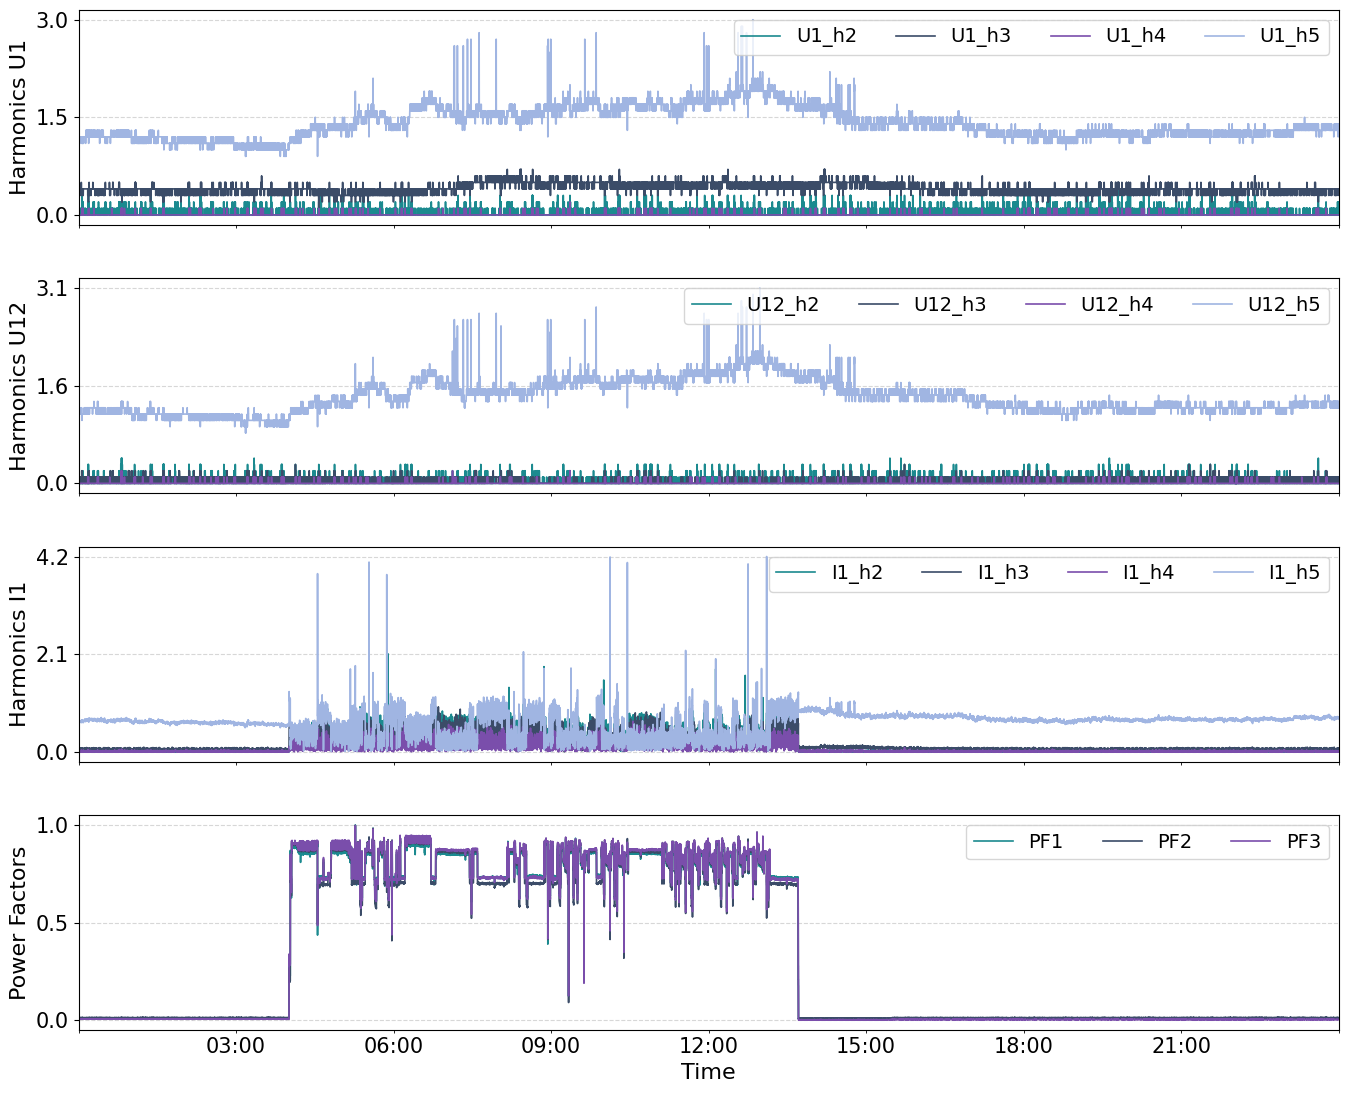

(<Figure size 1400x1200 with 4 Axes>,
 array([<Axes: xlabel='WsDateTime', ylabel='Harmonics U1'>,
        <Axes: xlabel='WsDateTime', ylabel='Harmonics U12'>,
        <Axes: xlabel='WsDateTime', ylabel='Harmonics I1'>,
        <Axes: xlabel='Time', ylabel='Power Factors'>], dtype=object))

In [2]:
# One clean function + execution.
# - Reads per-measurement CSV.XZ files: r"dataset_clean/TEC_Chiron800/<MEASUREMENT>/2024_<MEASUREMENT>.csv.xz"
# - Columns in each file: [WsDateTime, <MEASUREMENT>]
# - Filters EXACTLY the provided day (robust to DST via .dt.date)
# - Leaves gaps for outages (no interpolation)
# - Five ROWS of subplots (each row its own axis):
#     1) Voltages (U1, U2, U3, U_phase_avg)
#     2) Line voltages (U12, U23, U31, U_line_avg)
#     3) Currents (I1, I2, I3, I_sys)
#     4) Apparent power (S1, S2, S3, S_total)
#     5) Frequency (Freq)
# - X-axis ticks fixed at 00:00, 06:00, 12:00, 18:00, 24:00 (first & last guaranteed)
# - Y-axis: labels with exactly 1 decimal; include the data min & max as tick labels; axis limits padded by ±5%
# - Custom color palette for lines.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FixedLocator, FuncFormatter

#PALETTE = ["#3b4c68", "#5c6e91", "#7e91b9", "#a0b5e2", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]
PALETTE = ["#1B8A8F", "#3b4c68", "#7A4EAB",  "#a0b5e2", "#D55E00", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]

def plot_day_multi(u_root="dataset_clean/TEC_Chiron800", date_str="2024-10-27", save=False):
    """
    Load many measurements for one day and plot them in five stacked subplots.
    Files must be at: {u_root}/<MEASUREMENT>/2024_<MEASUREMENT>.csv.xz with columns [WsDateTime, <MEASUREMENT>].
    """

    # =========================
    # CONFIG (what to plot in each row)
    # =========================
    row1 = ["U1_h2","U1_h3","U1_h4","U1_h5"]
    row2 = ["U12_h2","U12_h3","U12_h4","U12_h5"]
    row3 = ["I1_h2","I1_h3","I1_h4","I1_h5"]
    row4 = ["PF1","PF2","PF3"]

    rows = [row1, row2, row3, row4]
    row_titles = ["Harmonics U1", "Harmonics U12", "Harmonics I1", "Power Factors"]

    # =========================
    # LOAD DATA
    # =========================
    day = pd.to_datetime(date_str).date()

    def load_series(meas):
        path = f"{u_root}/{meas}/2024_{meas}.csv.xz"
        df = pd.read_csv(path, compression="xz", parse_dates=["WsDateTime"])
        val_col = next(c for c in df.columns if c != "WsDateTime")
        sel = df[df["WsDateTime"].dt.date == day]
        return pd.Series(sel[val_col].values, index=sel["WsDateTime"], name=meas)

    row_dfs = []
    for group in rows:
        series_list = [load_series(m) for m in group]
        df = pd.concat(series_list, axis=1)
        df.index = pd.to_datetime(df.index).tz_localize(None)
        row_dfs.append(df)

    # =========================
    # PLOT
    # =========================
    fig, axes = plt.subplots(nrows=len(rows), ncols=1, figsize=(14, 12), sharex=True)

    title_fs, label_fs, tick_fs, legend_fs = 20, 16, 15, 14

    for ax, df, title in zip(axes, row_dfs, row_titles):
        colors = PALETTE[:len(df.columns)]
        df.plot(ax=ax, color=colors, linewidth=1.2)  # one axis per row
        ax.set_ylabel(title, fontsize=label_fs)
        ax.grid(True, which="both", axis="y", linestyle="--", alpha=0.5)
        ax.legend(fontsize=legend_fs, ncol=min(4, len(df.columns)))
        ax.tick_params(axis="both", which="both", labelsize=tick_fs)

        # ---- Y-AXIS FORMAT: include min & max as ticks, 1-decimal labels, ±5% margin ----
        row_min = float(np.nanmin(df.values))
        row_max = float(np.nanmax(df.values))
        span = row_max - row_min if row_max != row_min else max(abs(row_max), 1.0)
        pad = 0.05 * span
        ymin, ymax = row_min - pad, row_max + pad
        ax.set_ylim(ymin, ymax)

        ticks = np.linspace(row_min, row_max, 3)  # includes exact min & max
        ticks = np.round(ticks, 6)                # collapse near-duplicates
        ax.yaxis.set_major_locator(FixedLocator(ticks.tolist()))
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))

    axes[-1].set_xlabel("Time", fontsize=label_fs)

    # =========================
    # FIXED X-TICKS (00:00, 06:00, 12:00, 18:00, 24:00)
    # =========================
    start = pd.Timestamp(date_str)
    end   = start + pd.Timedelta(days=1)
    tick_times = [start + pd.Timedelta(hours=h) for h in (0,6,12,18,24)]
    tick_nums = [mdates.date2num(t.to_pydatetime()) for t in tick_times]

    for ax in axes:
        ax.set_xlim(start.to_pydatetime(), end.to_pydatetime())
        ax.xaxis.set_major_locator(FixedLocator(tick_nums))
        ax.xaxis.set_major_formatter(FuncFormatter(
            lambda x, pos: "24:00" if abs(x - tick_nums[-1]) < 1e-9
            else ("00:00" if abs(x - tick_nums[0]) < 1e-9
                  else f"{int((pos)*6):02d}:00")
        ))
    fig.subplots_adjust(left=0.08, right=0.98, top=0.93, bottom=0.08, hspace=0.25)

    out = None
    if save:
        out = f"tec_chiron800_quality_{date_str}.pdf"
        fig.savefig(out, dpi=150)

    plt.show()
    return fig, axes

# --- EXECUTION: set root folder and day, then run ---
plot_day_multi(u_root="../dataset_clean/TEC_Chiron800", date_str="2024-05-15", save=False)


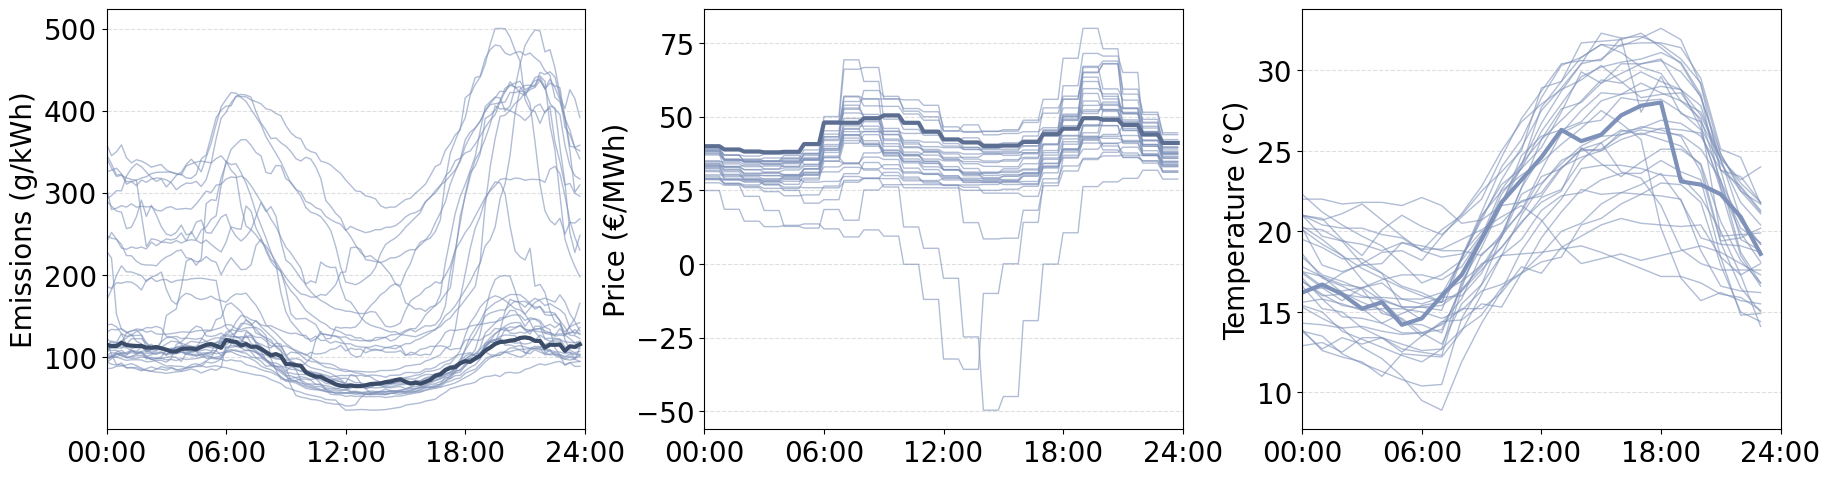

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Palette requested
PALETTE = ["#3b4c68", "#5c6e91", "#7e91b9", "#a0b5e2", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]

def plot_day_with_month_bg_3col(
    emissions_path=r"../dataset_clean\01exogenous_data\electricity_emissions_15min_transnetbw_2018_2024.csv",
    prices_path=r"../dataset_clean\01exogenous_data\electricity_prices_15min_de_2018_2024.csv",
    weather_path=r"../dataset_clean\01exogenous_data\weather_data_karlsruhe_hourly_2018_2024.csv",
    start_date="2019-08-02", tz="Europe/Berlin"
):
    # ---------- Load & time index ----------
    e = pd.read_csv(emissions_path, parse_dates=["utc_datetime"]).set_index("utc_datetime").sort_index()
    p = pd.read_csv(prices_path,    parse_dates=["utc_datetime"]).set_index("utc_datetime").sort_index()
    w = pd.read_csv(weather_path,   parse_dates=["utc_datetime"]).set_index("utc_datetime").sort_index()

    for df in (e, p, w):
        if df.index.tz is None:
            df.index = df.index.tz_localize("UTC")
        df.index = df.index.tz_convert(tz).tz_localize(None)

    e["emission_intensity_g_per_kwh"] = pd.to_numeric(e["emission_intensity_g_per_kwh"], errors="coerce")
    p["price_eur_per_mwh"]           = pd.to_numeric(p["price_eur_per_mwh"],           errors="coerce")
    w["temperature_air_mean_2m_°C"]  = pd.to_numeric(w["temperature_air_mean_2m_°C"],  errors="coerce")

    # ---------- Time windows ----------
    day_start = pd.Timestamp(start_date).normalize()
    day_end   = day_start + pd.Timedelta(days=1)

    month_start = day_start.replace(day=1)
    # first day of next month
    if month_start.month == 12:
        next_month_start = pd.Timestamp(year=month_start.year+1, month=1, day=1)
    else:
        next_month_start = pd.Timestamp(year=month_start.year, month=month_start.month+1, day=1)
    month_end = next_month_start

    # ---------- Helpers ----------
    def month_bg_and_day(df, value_col):
        m = df.loc[(df.index >= month_start) & (df.index < month_end), value_col].dropna()
        d = df.loc[(df.index >= day_start) & (df.index < day_end),     value_col].dropna()
        return m, d

    em_m, em_d = month_bg_and_day(e, "emission_intensity_g_per_kwh")
    pr_m, pr_d = month_bg_and_day(p, "price_eur_per_mwh")
    tp_m, tp_d = month_bg_and_day(w, "temperature_air_mean_2m_°C")

    # x = hours from midnight for plotting aligned daily profiles
    def to_hours_from_midnight(idx):
        return (idx - idx.normalize()).total_seconds() / 3600.0

    # ---------- Plot (3 columns, bigger fonts, grey monthly lines + highlighted day) ----------
    title_fs, label_fs, tick_fs = 20, 20, 20
    grey = "#7e91b9"

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

    panels = [
        ("Emissions (g/kWh)", em_m, em_d, PALETTE[0]),
        ("Price (€/MWh)",     pr_m, pr_d, PALETTE[1]),
        ("Temperature (°C)",  tp_m, tp_d, PALETTE[2]),
    ]

    for ax, (ylabel, month_series, day_series, color) in zip(axes, panels):
        # background: one light-grey line per day of the same month
        for date_val, sub in month_series.groupby(month_series.index.date):
            x_bg = to_hours_from_midnight(sub.index)
            ax.plot(x_bg, sub.values, color=grey, linewidth=1, alpha=0.6)

        # highlight chosen day
        x_day = to_hours_from_midnight(day_series.index)
        ax.plot(x_day, day_series.values, color=color, linewidth=3)

        ax.set_xlim(0, 24)
        ax.set_xticks([0, 6, 12, 18, 24])
        ax.set_xticklabels(["00:00","06:00","12:00","18:00","24:00"], fontsize=tick_fs)
        ax.tick_params(axis="y", labelsize=tick_fs)
        ax.set_ylabel(ylabel, fontsize=label_fs)
        ax.grid(True, axis="y", linestyle="--", alpha=0.4)

    fig.subplots_adjust(left=0.06, right=0.99, top=0.88, bottom=0.18, wspace=0.25)
    out = f"exogenous_features.pdf"
    #fig.savefig(out, dpi=150)
    plt.show()


# --- EXECUTION ---
plot_day_with_month_bg_3col(start_date="2019-08-02", tz="Europe/Berlin")


(<Figure size 1550x1196 with 2 Axes>,
 (<Axes: xlabel='Availability (%)', ylabel='Machine (records)'>,
  <Axes: xlabel='Share of missing seconds (%)'>))

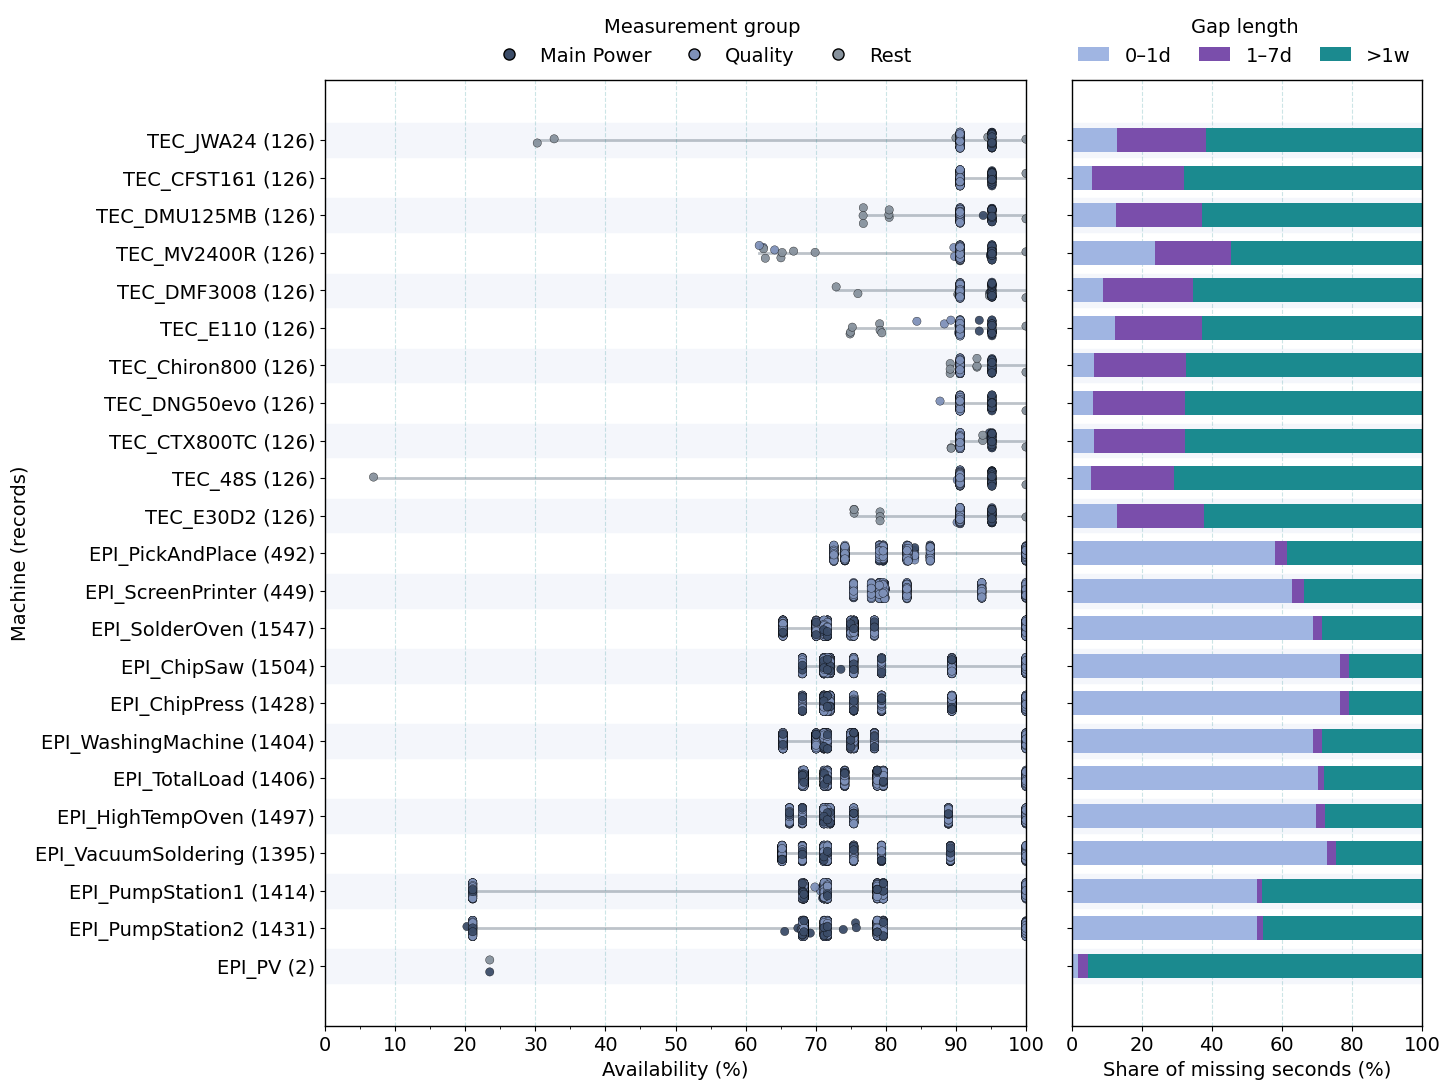

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.lines as mlines
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
from pathlib import Path
import hashlib
import re

#PALETTE = ["#1B8A8F", "#3b4c68", "#7A4EAB",  "#a0b5e2", "#D55E00", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]

# Palette
PALETTE = ["#3b4c68", "#5c6e91", "#7e91b9", "#a0b5e2",
           "#7A4EAB", "#D55E00", "#87929d", "#1B8A8F"]

def plot_availability_and_gaps(
    meta_dir: str | Path = "../dataset_clean/00meta_data",
    availability_csv: str = "02data_availability.csv",
    gap_csv: str = "03gap_composition_by_machine.csv",
    save: str | None = "01Figures/Fig_Availability.pdf",
):
    """Availability (left, 2/3) + Gap-length composition (right, 1/3)."""

    mpl.rcParams.update({
        "font.size": 14,
        "axes.labelsize": 14,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "axes.linewidth": 1.0,
        # Keep PDFs lighter/simpler
        "path.simplify": True,
        "path.simplify_threshold": 0.2,
        "pdf.fonttype": 42,   # TrueType
        "ps.fonttype": 42,
    })

    META = Path(meta_dir)

    # ----------------------------- LOAD (availability) -------------------
    avail_path = META / availability_csv
    df_all = pd.read_csv(avail_path)
    df_all["year"] = df_all["year"].astype(int)
    df_all["availability"] = df_all["availability"].astype(float)
    df_all["measurement"] = df_all["measurement"].astype(str)
    df_all["machine"] = df_all["machine"].astype(str)

    # --------------------------- GROUPING --------------------------------
    _main_kw  = ["volt","u","v","curr","i","power","p","q","s","pf","freq","gridfreq",
                 "dc_voltage","dc_current","dc_power","ac_activepower"]
    _quality_kw = ["thd","harm","_h","fund","_f"]
    _main_pat = re.compile("|".join(_main_kw), flags=re.IGNORECASE)
    _qual_pat = re.compile("|".join(_quality_kw), flags=re.IGNORECASE)

    def assign_group(measurement: str) -> str:
        m = measurement.lower()
        if any(k in m for k in ["yield","energy","angle","cos_phi","rotfield","loadtype","systemtime","ophours"]):
            return "Rest"
        if _qual_pat.search(m): return "Quality"
        if _main_pat.search(m): return "Main Power"
        return "Rest"

    df_all["group"] = df_all["measurement"].apply(assign_group)

    # ----------------------- ORDERING + COUNTS ---------------------------
    order = (df_all.groupby("machine")["availability"]
             .median().sort_values(ascending=True).index.tolist())
    files_per_machine = df_all.groupby("machine").size().reindex(order)

    # -------------------------- JITTER -----------------------------------
    def stable_jitter(machine: str, measurement: str, year: int, width: float = 0.22) -> float:
        key = f"{machine}|{measurement}|{year}"
        u = int(hashlib.sha1(key.encode("utf-8")).hexdigest()[:8], 16) / 16**8
        return (u - 0.5) * 2 * width

    row_index = {m: i for i, m in enumerate(order)}
    df_all["y"] = [row_index[m] + stable_jitter(m, meas, int(y))
                   for m, meas, y in zip(df_all["machine"], df_all["measurement"], df_all["year"])]

    # --------------------------- COLORS (palette) -------------------------
    meas_colors = {
        "Main Power": PALETTE[0],  # dark blue
        "Quality":    PALETTE[2],  # mid blue
        "Rest":       PALETTE[6],  # gray-blue
    }
    gap_colors = {
        "0–1d": PALETTE[3],
        "1–7d": PALETTE[4],
        ">1w":  PALETTE[7],
    }

    # ------------------------ LOAD GAP COMPOSITION -----------------------
    gap_path = META / gap_csv
    df_gap = pd.read_csv(gap_path)

    if {"<60min","1h–1d","1d–1w",">1w"}.issubset(df_gap.columns):
        df_gap["0–1d"] = df_gap["<60min"].fillna(0) + df_gap["1h–1d"].fillna(0)
        df_gap["1–7d"] = df_gap["1d–1w"].fillna(0)
        df_gap[">1w"]  = df_gap[">1w"].fillna(0)
    elif {"0–1d","1–7d",">1w"}.issubset(df_gap.columns):
        pass
    else:
        raise RuntimeError("gap_composition_by_machine.csv is missing expected columns.")

    df_len = (df_gap[["machine","0–1d","1–7d",">1w"]]
              .set_index("machine").reindex(order).fillna(0.0))

    # ---------------------------- PLOT (two panels) ----------------------
    fig_height = max(6, 0.52 * len(order))
    fig, (axL, axR) = plt.subplots(
        ncols=2, sharey=True,
        figsize=(15.5, fig_height),
        gridspec_kw={"width_ratios":[2, 1]}
    )

    y_positions = np.arange(len(order))

    # alternating row bands
    for i in range(len(order)):
        if i % 2 == 0:
            for ax in (axL, axR):
                ax.axhspan(i-0.45, i+0.45, color="#f4f6fb", zorder=0)

    # -------- Left (2/3): Availability (jittered) ------------------------
    # connector lines per machine
    for i, m in enumerate(order):
        sub = df_all[df_all["machine"] == m]
        if sub.empty:
            continue
        x_min = (sub["availability"].min() * 100)
        x_max = (sub["availability"].max() * 100)
        axL.plot([x_min, x_max], [i, i], color=PALETTE[6], lw=2.0, alpha=0.55, zorder=1, rasterized=True)

    # jittered points (rasterized for lightweight PDF)
    axL.scatter(
        df_all["availability"] * 100,
        df_all["y"],
        c=df_all["group"].map(meas_colors),
        s=36, linewidths=0.25, edgecolors="black", alpha=0.95, zorder=2,
        rasterized=True,
    )

    # Left axis cosmetics
    axL.set_xlim(0, 100)
    axL.xaxis.set_major_locator(mticker.MultipleLocator(10))
    axL.xaxis.set_minor_locator(mticker.MultipleLocator(5))
    axL.grid(axis="x", which="major", linestyle="--", color=PALETTE[7], alpha=0.22)
    axL.set_xlabel("Availability (%)")

    # y ticks & labels (SHORT form: Machine (records))
    yticklabels = [f"{m} ({int(files_per_machine[m])})" for m in order]
    axL.set_yticks(y_positions)
    axL.set_yticklabels(yticklabels)
    axL.set_ylabel("Machine (records)")

    # Hide y ticklabels on the right only (shared axis)
    axR.tick_params(labelleft=False)

    # -------- Right (1/3): Gap-length composition (stacked bars) --------
    left_stack = np.zeros(len(order))
    for col in ["0–1d","1–7d",">1w"]:
        axR.barh(
            y_positions, df_len[col].values, left=left_stack, height=0.64,
            color=gap_colors[col], edgecolor="none", zorder=2, rasterized=True
        )
        left_stack += df_len[col].values

    axR.set_xlim(0, 100)
    axR.xaxis.set_major_locator(mticker.MultipleLocator(20))
    axR.grid(axis="x", linestyle="--", color=PALETTE[7], alpha=0.22)
    axR.set_xlabel("Share of missing seconds (%)")

    # --- Legends (vector; keep crisp) ---
    meas_handles = [mlines.Line2D([0],[0], marker="o", linestyle="", markersize=8,
                                  markerfacecolor=meas_colors[g], markeredgecolor="black", label=g)
                    for g in ["Main Power", "Quality", "Rest"]]
    gap_handles  = [Patch(facecolor=gap_colors[k], edgecolor="none", label=k)
                    for k in ["0–1d","1–7d",">1w"]]

    fig.legend(handles=meas_handles, title="Measurement group",
               loc="upper center",
               bbox_to_anchor=(0.5, 0.95),
               ncol=3, frameon=False, columnspacing=1.4, handlelength=1.6)

    fig.legend(handles=gap_handles, title="Gap length",
               loc="upper center",
               bbox_to_anchor=(0.85, 0.95),
               ncol=3, frameon=False, columnspacing=1.4, handlelength=1.6)

    # Layout — extra margin for long names; leave room for legend
    plt.tight_layout(rect=[0.04, 0.03, 0.99, 0.90])

    if save:
        Path(save).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save, bbox_inches="tight", dpi=200)  # rasterized artists use this dpi
        print(f"[saved] {save}")
    return fig, (axL, axR)


# --- EXECUTION ---
plot_availability_and_gaps(
    meta_dir="../dataset_clean/00meta_data",
    save=False, #"01Figures/Fig6_availability.pdf"  # consider .png for instant viewing
)


✔️  Loading 02AVT (solader oven) for 2024


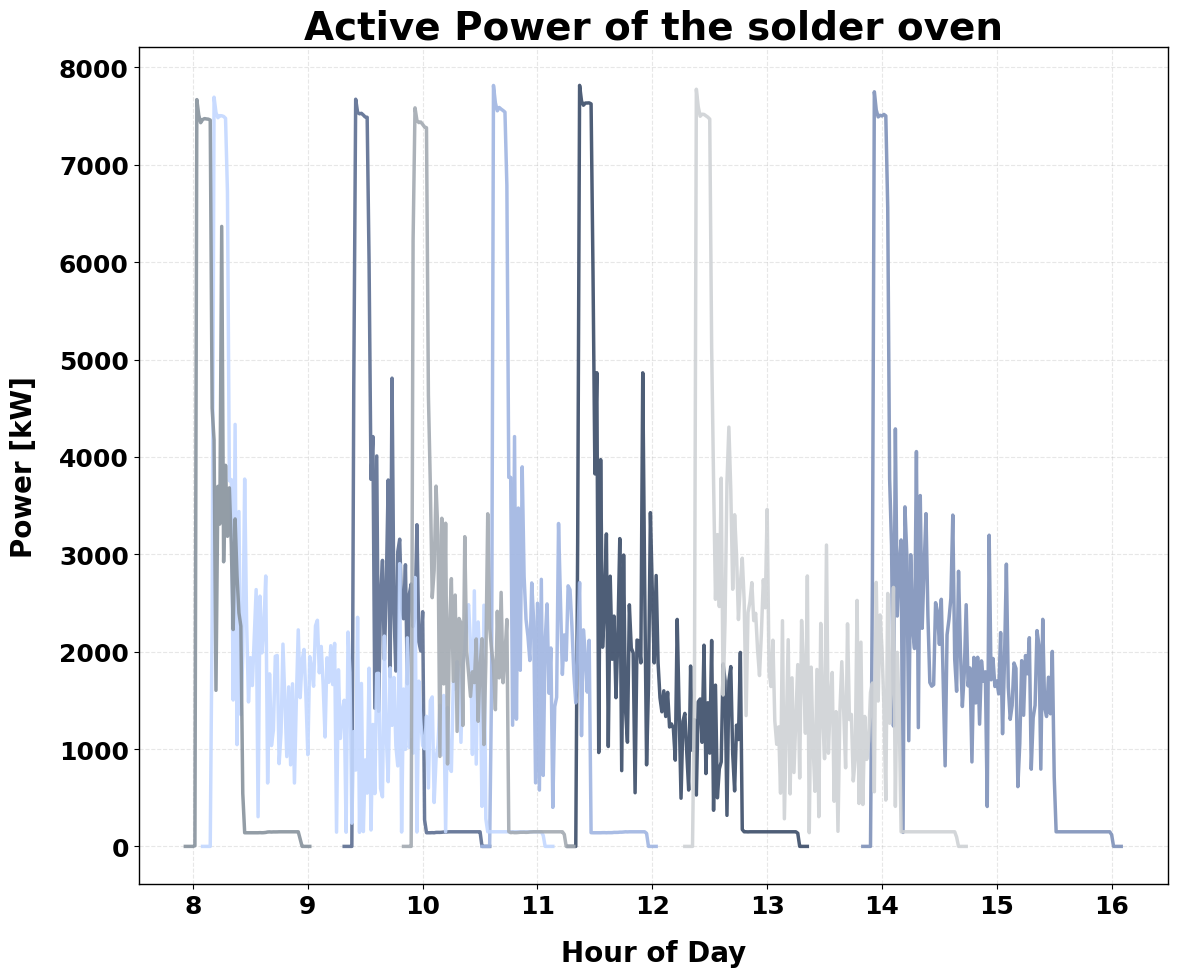

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setup
machine_id = "02AVT"
machine_name = "solader oven"
year = 2024
file_path = f"../dataset_clean/EPI_SolderOven/P_total/2024_P_total.csv.xz"

# Colors matching the graphical abstract
colors = ["#3b4c68", "#5c6e91", "#7e91b9", "#a0b5e2", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]

def preprocess_data_minute_resolution(df, year):
    full_index = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31 23:59", freq="min")
    df.index = df.index.round('min')
    df_grouped = df.groupby(df.index).mean()
    df_full = df_grouped.reindex(full_index, fill_value=0)
    df_full = df_full.fillna(0)

    # Apply Z-score based outlier removal ONLY for Power_AVT04
    if "Power_AVT04" in df_full.columns:
        # Mask values that are within acceptable Z-score range, set outliers to NaN
        z_scores = (df_full["Power_AVT04"] - df_full["Power_AVT04"].mean()).abs() / df_full["Power_AVT04"].std()
        df_full.loc[z_scores > 50, "Power_AVT04"] = np.nan

        # Fill NaNs (outliers) with zero or interpolation if preferred
        df_full["Power_AVT04"] = df_full["Power_AVT04"].fillna(0)

    return df_full


if os.path.exists(file_path):
    print(f"✔️  Loading {machine_id} ({machine_name}) for {year}")
    df = pd.read_csv(file_path, index_col="WsDateTime", parse_dates=True).sort_index()
    df_full = preprocess_data_minute_resolution(df, year)

    value_column = df_full.columns[0]
    df_full["Date"] = df_full.index.date

    # Select active days
    daily_sums = df_full.groupby("Date")[value_column].sum()
    active_days = daily_sums[daily_sums > 1.0].index
    selected_days = active_days[:min(8, len(active_days))]

    plt.figure(figsize=(12, 10))

    for i, date in enumerate(selected_days):
        day_df = df_full[df_full["Date"] == date]
        power_series = day_df[value_column]

        # Find non-zero range with padding
        nonzero_indices = power_series[power_series > 0.1].index
        if len(nonzero_indices) > 0:
            first = power_series.index.get_loc(nonzero_indices[0])
            last = power_series.index.get_loc(nonzero_indices[-1])
            start = max(0, first - 5)
            end = min(len(power_series) - 1, last + 5)
            trimmed_series = power_series.iloc[start:end + 1]

            # Extract hour of day for x-axis
            time_index = trimmed_series.index
            time_hours = [t.hour + t.minute / 60 for t in time_index]

            plt.plot(time_hours, trimmed_series.values, color=colors[i % len(colors)], alpha=0.9, linewidth=2.5)

    # Formatting
    plt.title("Active Power of the solder oven", fontsize=28, fontweight="bold")
    plt.xlabel("Hour of Day", fontsize=20, fontweight="bold", labelpad=15)
    plt.ylabel("Power [kW]", fontsize=20, fontweight="bold", labelpad=15)
    plt.xticks(fontsize=18, fontweight="bold")
    plt.yticks(fontsize=18, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    #plt.savefig("solder_oven_profiles.pdf", format="pdf", bbox_inches="tight")
    plt.show()
